In [3]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import datasets, classifiers, and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [5]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()
# print(type(mnist.data))
# mnist

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

1.  Inspeksi semua key dalam dataset
Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()
print(type(mnist.data))
mnist

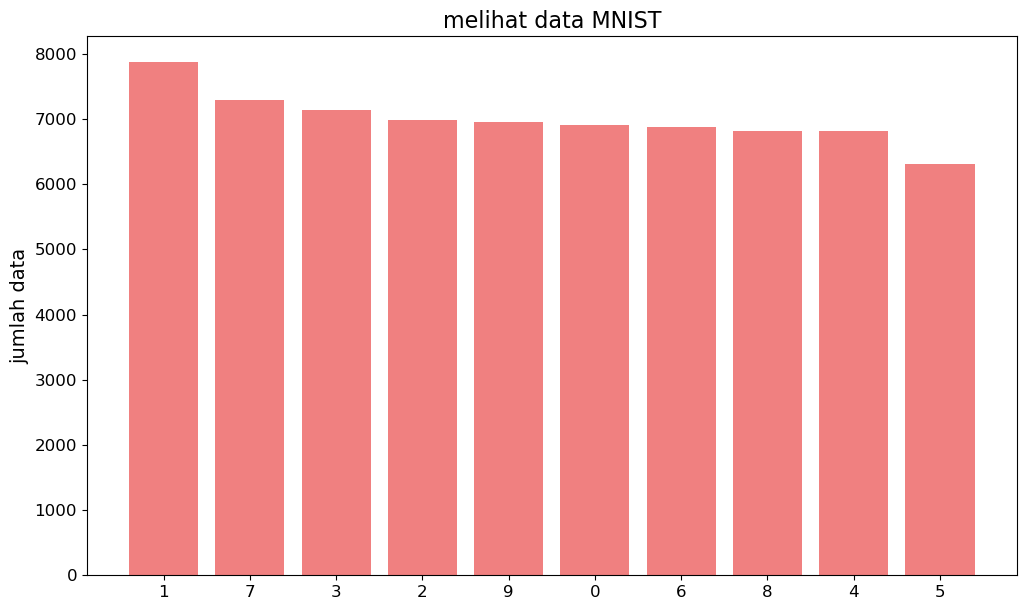

In [8]:
import numpy as np
import matplotlib.pyplot as plt

target =mnist.target.value_counts()

%matplotlib inline

plt.figure(figsize=(12,7))
plt.bar(target.keys(), target, color='lightcoral')

plt.title('melihat data MNIST', size=16)
plt.ylabel('jumlah data', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

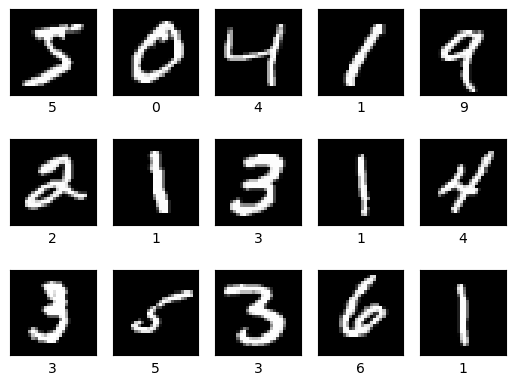

In [9]:
X = np.array(mnist.data)
Y = np.array(mnist.target)

fig, ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=Y[i])

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [10]:
from sklearn.decomposition import PCA as randomizedPCA

pca = randomizedPCA(n_components=150, whiten=True, random_state=42)

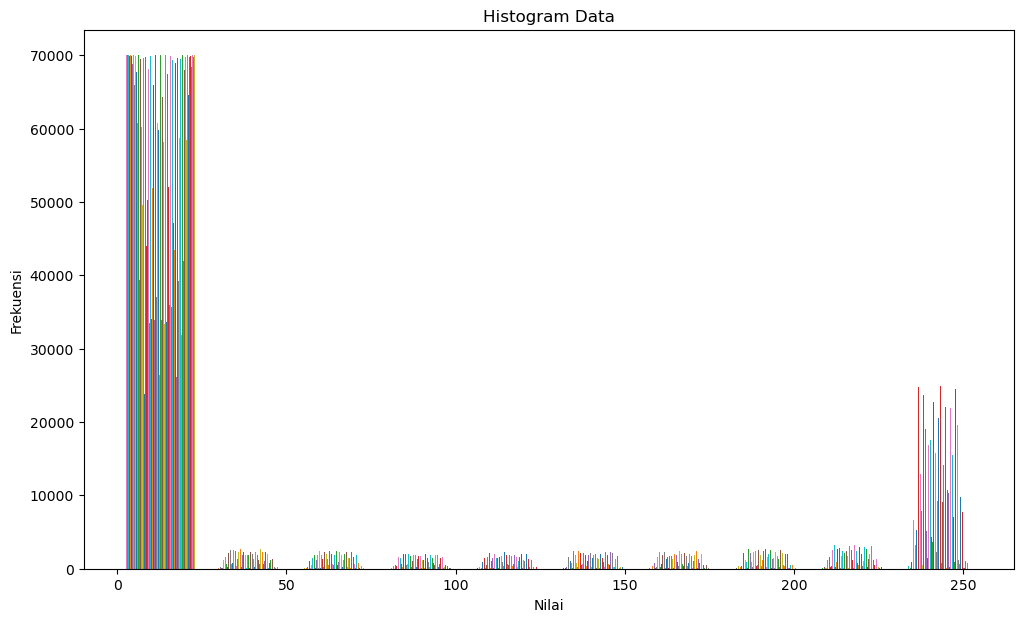

In [11]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(mnist.data)
Y = np.array(mnist.target)

plt.figure(figsize=(12,7))
plt.hist(X)
plt.title("Histogram Data")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.show()

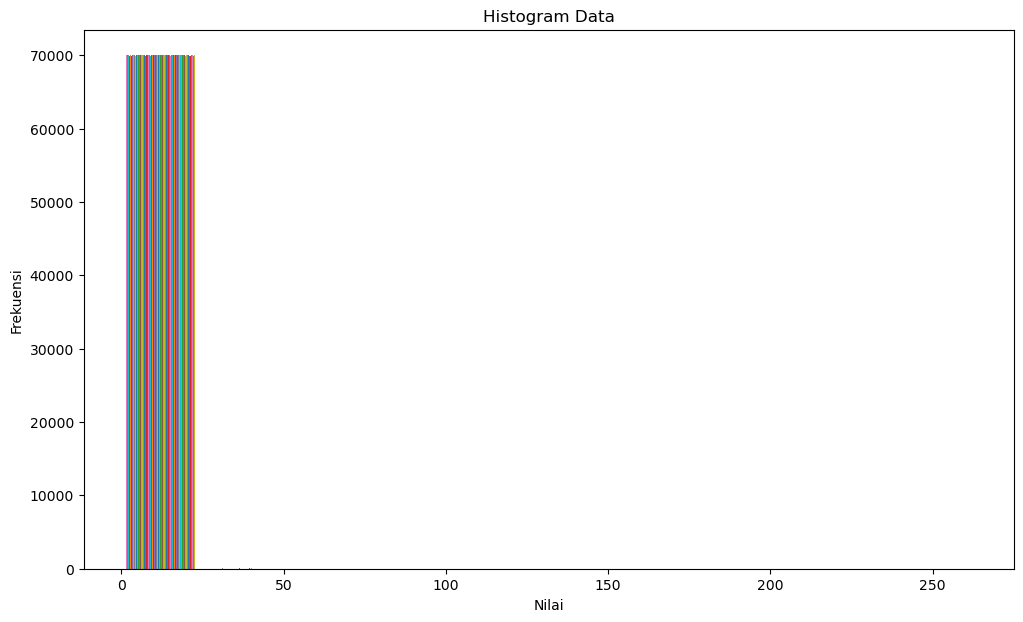

In [12]:

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()


scaler.fit(X)
x_standard = scaler.transform(X)

plt.figure(figsize=(12,7))
plt.hist(x_standard)
plt.title("Histogram Data")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.show()



4.  Buatlah data training dan data testing menggunakan raio 70:30, 80:20, 90:10.

In [14]:
from sklearn.model_selection import train_test_split

train_x7, test_x3, train_y7, test_y3 = train_test_split( X, Y, test_size=0.3, random_state=0)
train_x8, test_x2, train_y8, test_y2 = train_test_split( X, Y, test_size=0.3, random_state=0)
train_x9, test_x1, train_y9, test_y1 = train_test_split( X, Y, test_size=0.3, random_state=0)

train_x7_pca = pca.fit_transform(train_x7)
test_x3_pca = pca.fit_transform(test_x3)

train_x8_pca = pca.fit_transform(train_x8)
test_x2_pca = pca.fit_transform(test_x2)

train_x9_pca = pca.fit_transform(train_x9)
test_x1_pca = pca.fit_transform(test_x1)

5. Lakukan Proses Klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
    - Anda diperbolehkan untuk melakukan tunning parameter.
    - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [15]:
from sklearn.naive_bayes import GaussianNB
# histogram 
model1 = GaussianNB()
model2 = GaussianNB()
model3 = GaussianNB()
# PCA 
model4 = GaussianNB()
model5 = GaussianNB()
model6 = GaussianNB()

# train & test 70:30
model1.fit(train_x7, train_y7);
model4.fit(train_x7_pca, train_y7);
# train & test 80:20
model2.fit(train_x8, train_y8);
model5.fit(train_x8_pca, train_y8);
# train & test 90:10
model3.fit(train_x9, train_y9);
model6.fit(train_x9_pca, train_y9);

# predict Histogram 
pred_y1 = model1.predict(test_x3)
pred_y2 = model2.predict(test_x2)
pred_y3 = model3.predict(test_x1)

# predict PCA 
pred_y4 = model4.predict(test_x3_pca)
pred_y5 = model5.predict(test_x2_pca)
pred_y6 = model6.predict(test_x1_pca)

# score Histogram 
score1 = model1.score(test_x3,test_y3)
score2 = model2.score(test_x2,test_y2)
score3 = model3.score(test_x1,test_y1)

# score PCA 
score4 = model4.score(test_x3_pca,test_y3)
score5 = model5.score(test_x2_pca,test_y2)
score6 = model6.score(test_x1_pca,test_y1)

print("Score Histogram")
print("Score 70:30  : ", score1)
print("Score 80:20  : ", score2)
print("Score 90:10  : ", score3)
print("Score PCA")
print("Score 70:30  : ", score4)
print("Score 80:20  : ", score5)
print("Score 90:10  : ", score6)

Score Histogram
Score 70:30  :  0.541047619047619
Score 80:20  :  0.541047619047619
Score 90:10  :  0.541047619047619
Score PCA
Score 70:30  :  0.4769047619047619
Score 80:20  :  0.4769047619047619
Score 90:10  :  0.4769047619047619




6.  Evaluasi model yang Anda buat terhadap data training dan data testing.

- Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.



In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Metric Accuracy 

accuracy1 = accuracy_score(test_y3, pred_y1)
accuracy2 = accuracy_score(test_y2, pred_y2)
accuracy3 = accuracy_score(test_y1, pred_y3)

print("Metric Accuracy 70:30  : ", accuracy1)
print("Metric Accuracy 80:20  : ", accuracy2)
print("Metric Accuracy 90:10  : ", accuracy3)

# Classification Report 

report1 = classification_report(test_y3, pred_y1)
report2 = classification_report(test_y2, pred_y2)
report3 = classification_report(test_y1, pred_y3)

print("Classification Report 70:30")
print(report1)
print("Classification Report 80:20")
print(report2)
print("Classification Report 90:10")
print(report3)

# Confusion Matrix 
cm1 = confusion_matrix(test_y3, pred_y1)
cm2 = confusion_matrix(test_y2, pred_y2)
cm3 = confusion_matrix(test_y1, pred_y3)

print("Confusion Matrix 70:30")
print(cm1)
print("Confusion Matrix 80:20")
print(cm2)
print("Confusion Matrix 90:10")
print(cm3)

Metric Accuracy 70:30  :  0.541047619047619
Metric Accuracy 80:20  :  0.541047619047619
Metric Accuracy 90:10  :  0.541047619047619
Classification Report 70:30
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      2077
           1       0.80      0.95      0.87      2385
           2       0.86      0.31      0.45      2115
           3       0.79      0.28      0.42      2117
           4       0.82      0.14      0.24      2004
           5       0.58      0.05      0.09      1900
           6       0.58      0.95      0.72      2045
           7       0.89      0.28      0.43      2189
           8       0.28      0.55      0.37      2042
           9       0.35      0.94      0.51      2126

    accuracy                           0.54     21000
   macro avg       0.67      0.53      0.49     21000
weighted avg       0.67      0.54      0.50     21000

Classification Report 80:20
              precision    recall  f1-score   support

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

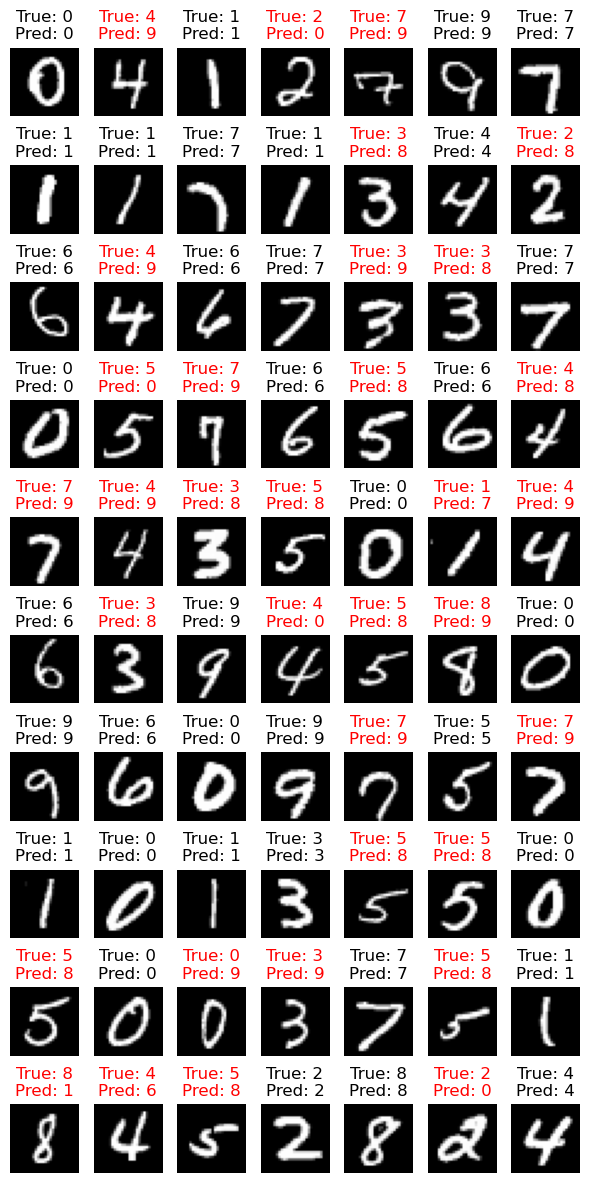

In [17]:
import pandas as pd

n_samples_to_display = 70
# Display images with true labels and predicted labels
plt.figure(figsize=(6, 12))
for i in range(n_samples_to_display):
    plt.subplot(10, 7, i + 1)
    plt.imshow(test_x3[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = test_y3[i] if isinstance(test_y3, pd.Series) else test_y3[i]
    pred_label = pred_y1[i] if isinstance(pred_y1, pd.Series) else pred_y1[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [1]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Contoh melatih model SVM
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Contoh melatih model Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediksi model SVM
test_preds_svm = clf.predict(X_test_70)

# Prediksi model Naive Bayes
test_preds_nb = mnb.predict(X_test_70)

from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test_70, test_preds_svm) * 100
nb_accuracy = accuracy_score(y_test_70, test_preds_nb) * 100

print(f'Akurasi SVM: {svm_accuracy:.2f}%')
print(f'Akurasi Naive Bayes: {nb_accuracy:.2f}%')


NameError: name 'X_train' is not defined